<a href="https://colab.research.google.com/github/Xalphanos/24f2006988_git_challenge_lab/blob/main/03ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Some computer vision librariew

[[TorchVision]]
* torchvision.datasets
* torchvision.models= models which are already trained
* torchvision.transforms
* torch.utils.data.Dataset - Base dataset class
* torch.utils.data.Dataloader - Creates the amin iterable over a dataset

In [1]:
import torch
from torch import nn


import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.9.0+cu126
0.24.0+cu126


In [2]:
## getting a dataset
###the dataset we will be suing is fashion mnist
##setting up the training data

from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # do we want the training dataset
    download= True, # do we want to download yes/no?
    transform= torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform=None # how do we want to transform the lablels/targets?
)


test_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=False, # do we want the training dataset
    download= True, # do we want to download yes/no?
    transform=ToTensor(),
    target_transform=None
)


In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
#see the first training example
image , label = train_data[0]
print(image,label)
print(image.shape)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [5]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
# same as the code above but with the labels given to it
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
print(f"image shape: {image.shape} - > color channels, height, width")
print(f"Image label: {class_names[label]}")

image shape: torch.Size([1, 28, 28]) - > color channels, height, width
Image label: Ankle boot


## Visualize

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

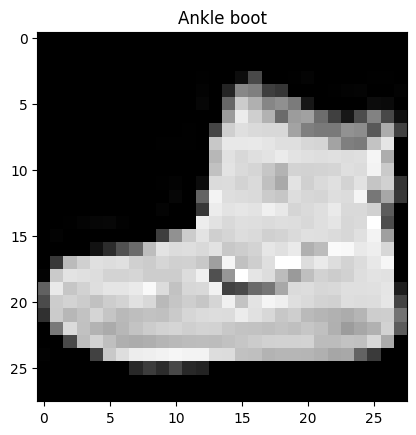

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(),cmap="grey")
plt.title(class_names[label])



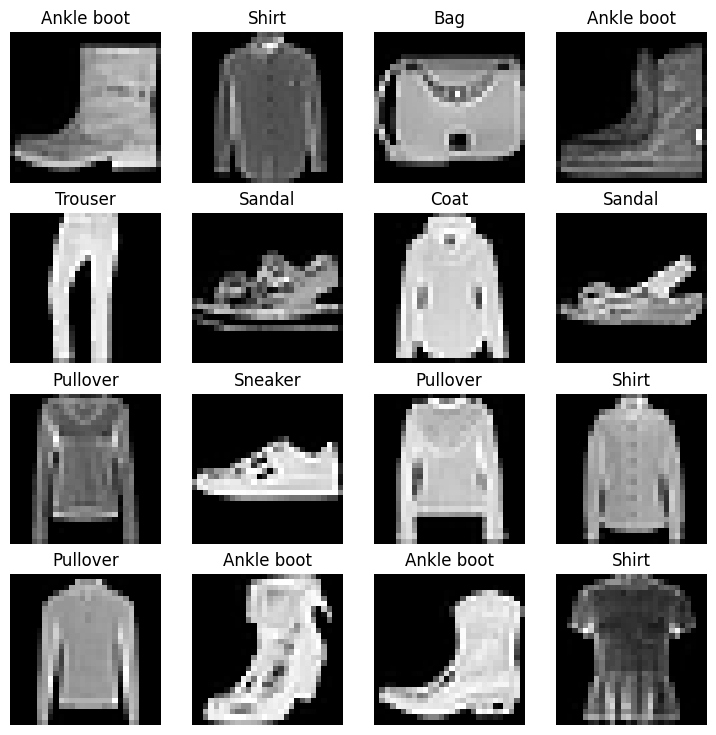

In [10]:
torch.manual_seed(42)

fig=plt.figure(figsize=(9,9))

rows,cols=4,4
for i in range(rows*cols):
  random_idx=torch.randint(0, len(train_data),size=[1]).item()
  img, label=train_data[random_idx]
  fig.add_subplot(rows, cols,i+1)

  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [11]:
#prepare dataloader
#turn the data into minibatches at a abtch size of 32 at a time
#updates th internal state every 32 images


from torch.utils.data import DataLoader

BATCH_SIZE=32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)


test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7cdb5a00f500>,
 <torch.utils.data.dataloader.DataLoader at 0x7cdb59e43740>)

In [12]:
print(f" Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)}")
print(f"Length of test_dataloader: {len(test_dataloader)}")
print(f"Batch size of both of them is {BATCH_SIZE}")

 Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7cdb5a00f500>, <torch.utils.data.dataloader.DataLoader object at 0x7cdb59e43740>)
Length of train_dataloader: 1875
Length of test_dataloader: 313
Batch size of both of them is 32


In [13]:
# we can see what is inside the dataloader by usig this and by god we will use this, seems like this is like looking inside a single element
# of the dataloader

train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size torch.Size([1, 28, 28])
Label: 8, label shape torch.Size([]) 


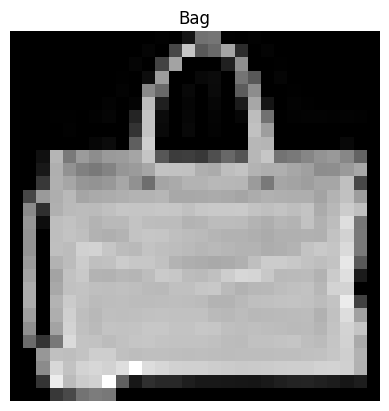

In [14]:
# show a sample of the  train_features_batch

#torch.manual_seed(42)

random_idx=torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size {img.shape}")
print(f"Label: {label}, label shape {label.shape} ")




In [15]:
#building a baseline model
#this will likely be a simple computer vision model that we will try and improve upon with the subsequent models
#start simply and add complexity as we know on

#improve through experimentation


In [16]:
#simple flattening model
flatten_model=nn.Flatten()

x=train_features_batch[0]

result=flatten_model(x)
print(train_features_batch[0].shape)
print(result.shape)
# this is what is happening when we are actually flattening a data point


torch.Size([1, 28, 28])
torch.Size([1, 784])


In [17]:
from torch import nn
class FashionMNISTModelPrototype1(nn.Module):
  def __init__(self,
               input_shape=int,
               output_shape=int,
               hidden_units=int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),# flatten layer is very important to convert and keep it in a vector that we can then yuse later
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)

    )
  def forward(self,x):
    return self.layer_stack(x)




Settign up an instance of the model for testing

In [18]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(42)

model_0 = FashionMNISTModelPrototype1(
    input_shape=28*28,#this is the 28*28
    output_shape=len(class_names),
    hidden_units=10
)
model_0.to(device)

FashionMNISTModelPrototype1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
test_dummy_1=torch.rand([1,1,28,28]).to(device)
model_0(test_dummy_1)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], device='cuda:0', grad_fn=<AddmmBackward0>)

# Setting up the loss function and the optimiser for calculating the function

* loss fn likely would be cross entropy u? loss as it is a multi class classification problem

* otpim like strochastic gradient descent - pardon my spelling its something i guess

* similarly to last time we also would need some evaluation metric


In [20]:
import requests
from pathlib import Path


if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


helper_functions.py already exists


# import accuray

In [21]:
from helper_functions import accuracy_fn

# setup loss function and optimiser
loss_fn=nn.CrossEntropyLoss()

optimiser=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)

In [22]:
loss_fn

CrossEntropyLoss()

## fucntion to time the machine learning model

In [23]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  "here we have to print the diffference to get the difference in time"
  total_time= end - start
  print(f"Train time on {device} is {total_time:.3f} seconds")
  return total_time

In [24]:
start_time=timer()
#some code
end_time=timer()
print_train_time(start=start_time,
                 end=end_time)

Train time on None is 0.000 seconds


4.521200025919825e-05

# finally creating the training looop


In [25]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu=timer()

epochs=3

#train and test loop

for epoch in tqdm(range(epochs)):
  print(f"epochs // {epoch}")

  train_loss=0
  train_acc=0 # Initialize train_acc here

  # add a loop to loop through the training batches

  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    X, y = X.to(device), y.to(device) # Move data to target device
    y_pred = model_0(X) #1 forward pass

    #this is calculate loss(per batch) like this is the new implementation part as the loss function is not working wihth batches
    loss=loss_fn(y_pred, y)

    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Accumulate train_acc per batch

    optimiser.zero_grad()# taking the gradient of the loss funtion zero

    loss.backward()

    optimiser.step()

    if batch%400==0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)}samples")

  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader) # Average train_acc after the batch loop
  print(f"Train loss : {train_loss:.5f}")
  print(f"Train acc : {train_acc:.5f}")

  # here we will be testing the model so we keep it in the test phase
  test_loss, test_acc=0,0

  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device) # Move data to target device
      test_pred=model_0(X_test)# the forward pass of the model in the testing mode/ inferenance mode

      test_loss += loss_fn(test_pred, y_test) #as we are taking jbatvh by batch so we just add them up as we go
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1)) # Changed y_pred to test_pred

    # we need to clculate th8e average test loss per batch, fkinig this batch thing is making everything simpler\
    # but also complicated

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    print(f"Test loss: {test_loss:.5f}")
    print(f"Test acc: {test_acc:.5f}")
    print(f"train loss: {train_loss:.5f}")
    print(f"train acc: {train_acc:.5f}") # Corrected typo


train_time_end_on_cpu=timer()
total_t_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                        end=train_time_end_on_cpu,
                                        device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

epochs // 0
Looked at 0/60000samples
Looked at 12800/60000samples
Looked at 25600/60000samples
Looked at 38400/60000samples
Looked at 51200/60000samples
Train loss : 0.90961
Train acc : 70.87000
Test loss: 0.62902
Test acc: 78.63419
train loss: 0.90961
train acc: 70.87000
epochs // 1
Looked at 0/60000samples
Looked at 12800/60000samples
Looked at 25600/60000samples
Looked at 38400/60000samples
Looked at 51200/60000samples
Train loss : 0.55733
Train acc : 81.08667
Test loss: 0.54409
Test acc: 81.13019
train loss: 0.55733
train acc: 81.08667
epochs // 2
Looked at 0/60000samples
Looked at 12800/60000samples
Looked at 25600/60000samples
Looked at 38400/60000samples
Looked at 51200/60000samples
Train loss : 0.50266
Train acc : 82.75167
Test loss: 0.51368
Test acc: 81.99880
train loss: 0.50266
train acc: 82.75167
Train time on cuda:0 is 28.276 seconds


# Now make the predictions and evaluating the model

In [26]:
 #mostly for reproducability
torch.manual_seed(42)

def eval_model_0(model: torch.nn.Module,
                 data_loader: torch.utils.data.DataLoader,
                 loss_fn: torch.nn.Module,
                 accuracy_fn,
                 device=device):
  """Returns a dictionary containing the results of model prediciting on the dataloader"""
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):

    #make the predictions aictually th8e forward pass of the model samw but we will be using it as a function now

      X,y=X.to(device), y.to(device)
      y_pred=model(X)

      #Acccumulate the loss function and per batch it is
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                        y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__,#only works when model was created with class name
          "model_loss": loss.item(),
          "model_acc": acc}

#Calculate model 0 results

model_0_results = eval_model_0(model=model_0,
                                 data_loader=test_dataloader,
                                 loss_fn=loss_fn,
                                 accuracy_fn=accuracy_fn,
                                 device=device)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelPrototype1',
 'model_loss': 0.5136751532554626,
 'model_acc': 81.9988019169329}

Using device agnostic code for gpu and now will be using gpu


In [27]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [28]:
# create a model with linear and non linear layers
class FashionMNISTModelPrototypeV2(nn.Module):
  def __init__(self,
               input_shape=int,
               output_shape=int,
               hidden_units=int):
    super().__init__()
    self.layer_stack= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)



In [29]:
torch.manual_seed(42)

model_1=FashionMNISTModelPrototypeV2(input_shape=784,
                                     hidden_units=10,
                                     output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [30]:
## seeting up the loss funciton and optimiser

from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss()
optimiser=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)

In [31]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device):
    """Performs a full epoch of training as it is a trianing standalone function."""

    # Training loop
    train_loss = 0
    train_acc = 0
    model.train()

    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X) # Fixed model_(X) to model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(data_loader.dataset)} samples")

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss : {train_loss:.5f}")
    print(f"Train acc : {train_acc:.5f}")





In [32]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device):
    """Performs a full epoch of  testing as it is a testing standalone function."""

    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X_test, y_test in data_loader: # Use data_loader
            X_test, y_test = X_test.to(device), y_test.to(device) # Move to device
            test_pred = model(X_test) # Use the passed model

            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss is {test_loss:.5f}")
        print(f"Test accuracy is {test_acc:.5f}")

In [33]:
torch.manual_seed(42)
#timer

from timeit import default_timer as timer
train_time_start_on_cpu=timer()

epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epochs: {epoch}\n------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimiser,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            optimizer=optimiser,
            accuracy_fn=accuracy_fn,
            device=device
            )
  train_time_end_on_cpu=timer()
  total_train_time_model_1=print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss : 0.83645
Train acc : 67.45500
Test loss is 0.59012
Test accuracy is 76.88698
Train time on cuda is 10.228 seconds
Epochs: 1
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss : 0.55261
Train acc : 79.11000
Test loss is 0.57572
Test accuracy is 79.38299
Train time on cuda is 21.677 seconds
Epochs: 2
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss : 0.49764
Train acc : 81.93833
Test loss is 0.52091
Test accuracy is 81.73922
Train time on cuda is 31.632 seconds


In [34]:
#get model_1 results dictionary



model_1_results=eval_model_0(model=model_1,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn
                          )
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelPrototypeV2',
 'model_loss': 0.5209096074104309,
 'model_acc': 81.73921725239616}

# Convolusional neural netwoek, very adept at finding patterns in visual data
hehe used by ccpea


In [35]:
class FashionMNISTModelPrototypeVcnn(nn.Module):
  """
  Model architecture that replicates tinyvcc model
  from ocnjvolusional neural networks
  """


  def __init__(self,
               input_shape:int,
               output_shape:int,
               hidden_units:int) -> None:
    super().__init__
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channel=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channel=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
                  )
    self.conv_block_2=nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,
                out_channel=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channel=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2,
                   stride=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*0,
                  out_features=output_shape))

  def forward(self,x):
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [36]:
import torch
from torch import nn

class FashionMNISTModelPrototypeVcnn(nn.Module):
  """
  Model architecture that replicates tinyvcc model
  from convolutional neural networks
  """
  def __init__(self,
               input_shape:int,
               output_shape:int,
               hidden_units:int) -> None:
    super().__init__() # Added parentheses
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units, # Corrected: out_channel -> out_channels
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units, # Corrected: out_channel -> out_channels
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
                  )
    self.conv_block_2=nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units, # Corrected: out_channel -> out_channels
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units, # Corrected: out_channel -> out_channels
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2,
                   stride=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*9*1, # Corrected: hidden_units*0 -> hidden_units*7*7
                  out_features=output_shape))

  def forward(self,x):
    x=self.conv_block_1(x)
    #print(f" output shape after convolutional block 1{x.shape}")
    x=self.conv_block_2(x)
    #print(f" output shape after convolutional block 2{x.shape}")
    x=self.conv_block_2(x)
    x=self.classifier(x)
    #print(f" output shape after classifier{x.shape}")
    return x

torch.manual_seed(42)

model_2 = FashionMNISTModelPrototypeVcnn(input_shape=1,
                                         hidden_units=10,
                                         output_shape=len(class_names)).to(device)
model_2


FashionMNISTModelPrototypeVcnn(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=90, out_features=10, bias=True)
  )
)

In [37]:


torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")



Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

# SOme visualizations of wheat we are working with for now

In [38]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1) # also try using "valid" or "same" here



conv_output = conv_layer(test_image)
print(f"Convolutional layer output shape: {conv_output.shape}")

Convolutional layer output shape: torch.Size([10, 64, 64])


In [39]:
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

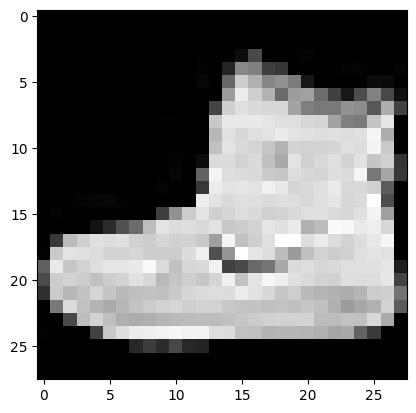

In [40]:
plt.imshow(image.squeeze(),cmap="gray")

In [41]:
rand_image_tensor=torch.randn(size=(1,28,28))
model_2(rand_image_tensor.unsqueeze(dim=0).to(device))

tensor([[ 0.0918, -0.0496, -0.0885, -0.0338, -0.0493,  0.0100,  0.0488, -0.0202,
          0.0649,  0.0076]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [42]:
print(f"the test image shape is {test_image.shape}")
print(f"when we are unsqeezing it {test_image.unsqueeze(dim=0).shape}")


max_pool_layer=nn.MaxPool2d(kernel_size=2)

test_image_through_conv= conv_layer(test_image.unsqueeze(dim=0))
print(f"after conv layer{test_image_through_conv.shape}")
print(f"after max pool layer{max_pool_layer(test_image_through_conv).shape}") # here both the layers are being utilized

the test image shape is torch.Size([3, 64, 64])
when we are unsqeezing it torch.Size([1, 3, 64, 64])
after conv layertorch.Size([1, 10, 64, 64])
after max pool layertorch.Size([1, 10, 32, 32])


In [43]:
#a bit more experimentation

random_tensor = torch.randn(size=(1,1,2,3))
print(f"Random tensor: {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# similar max pool layer that we have sused before
max_pool_layer= nn.MaxPool2d(kernel_size=2)

# now getting the reusltant tensor after passing it through the layer and seeing the reuslts
max_pool_tensor= max_pool_layer(random_tensor)
print(f"MAx pool tensor {max_pool_tensor}")
print(f"MAx pool tensor shape {max_pool_tensor.shape}")


Random tensor: tensor([[[[ 0.9280,  0.7899,  1.5557],
          [-1.3505,  1.1451,  0.6096]]]])
Random tensor shape: torch.Size([1, 1, 2, 3])
MAx pool tensor tensor([[[[1.1451]]]])
MAx pool tensor shape torch.Size([1, 1, 1, 1])


#Again settig up loss fucntion and optimiser

In [44]:
# setup loss function and eval metric and optimiser


from helper_functions import accuracy_fn


loss_fn=nn.CrossEntropyLoss()

optimiser=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.1)

# training and testing our first cnn model


In [45]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as  timer

train_time_start_model_2=timer()

epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch is : {epoch}")

  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimiser,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            optimizer=optimiser,
            accuracy_fn=accuracy_fn,
            device=device)
  train_time_end_model=timer()
  total_train_time_model_2=print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch is : 0
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss : 1.66648
Train acc : 36.94333
Test loss is 2.30441
Test accuracy is 9.99401
Train time on cuda is 12.533 seconds
Epoch is : 1
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss : 2.30470
Train acc : 9.86333
Test loss is 2.30367
Test accuracy is 9.99401
Train time on cuda is 24.945 seconds
Epoch is : 2
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss : 2.30390
Train acc : 9.88167
Test loss is 2.30323
Test accuracy is 9.99401
Train time on cuda is 37.340 seconds


In [46]:
from torch.utils import data
model_2_results=eval_model_0(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelPrototypeVcnn',
 'model_loss': 2.3032333850860596,
 'model_acc': 9.994009584664537}

# Compare model results and training time

In [47]:
import pandas as pd

compare_results=pd.DataFrame(data=[model_0_results,model_1_results,model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelPrototype1,0.513675,81.998802
1,FashionMNISTModelPrototypeV2,0.520910,81.739217
2,FashionMNISTModelPrototypeVcnn,2.303233,9.994010


# add trainig time to results compairison


In [48]:
compare_results["train_time"]=[total_train_time_model_2,total_train_time_model_1,total_train_time_model_1]
compare_results

,model_name,model_loss,model_acc,train_time
0,FashionMNISTModelPrototype1,0.513675,81.998802,37.339789
1,FashionMNISTModelPrototypeV2,0.520910,81.739217,31.632087
2,FashionMNISTModelPrototypeVcnn,2.303233,9.994010,31.632087


In [49]:
!nvidia-smi


Sun Dec 28 13:27:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   68C    P0             29W /   70W |     188MiB /  15360MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Text(0, 0.5, 'model')

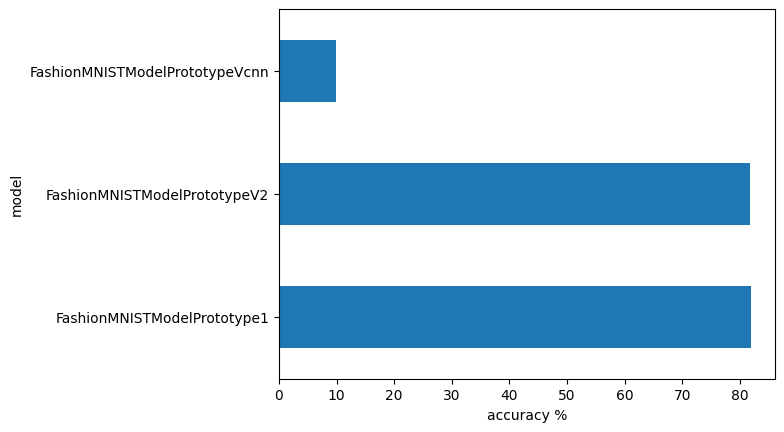

In [50]:
# visualize our model results in a more detailed wsya

compare_results.set_index("model_name")["model_acc"].plot(kind="barh")

plt.xlabel("accuracy %")
plt.ylabel("model")

Make predictions with the cnn model as it performs the best among them



In [51]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample=torch.unsqueeze(sample, dim=0).to(device)

      # the coveted forward pass
      pred_logit=model(sample)

      #get the prediction probability
      pred_prob=torch.softmax(pred_logit.squeeze(), dim=0)

      # get the pred prob off the gpu for further calcualations as we know that cpu performs better than the gpu in these scenarios
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)

In [52]:
#how the tensors are shaped

img, label=test_data[0][:10]
img.shape,label

(torch.Size([1, 28, 28]), 9)

In [53]:
import random
#random.seed(42)
test_samples=[]
test_labels=[]


for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'T-shirt/top')

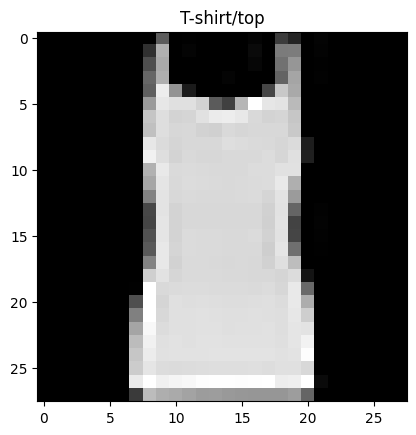

In [54]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [55]:
pred_probs=make_predictions(model=model_2,
                           data=test_samples)


pred_probs[:10]

tensor([[0.0987, 0.0961, 0.1013, 0.0985, 0.1085, 0.0983, 0.0977, 0.1030, 0.0961,
         0.1019],
        [0.0987, 0.0961, 0.1013, 0.0985, 0.1085, 0.0983, 0.0977, 0.1030, 0.0961,
         0.1019],
        [0.0987, 0.0961, 0.1013, 0.0985, 0.1085, 0.0983, 0.0977, 0.1030, 0.0961,
         0.1019],
        [0.0987, 0.0961, 0.1013, 0.0985, 0.1085, 0.0983, 0.0977, 0.1030, 0.0961,
         0.1019],
        [0.0987, 0.0961, 0.1013, 0.0985, 0.1085, 0.0983, 0.0977, 0.1030, 0.0961,
         0.1019],
        [0.0987, 0.0961, 0.1013, 0.0985, 0.1085, 0.0983, 0.0977, 0.1030, 0.0961,
         0.1019],
        [0.0987, 0.0961, 0.1013, 0.0985, 0.1085, 0.0983, 0.0977, 0.1030, 0.0961,
         0.1019],
        [0.0987, 0.0961, 0.1013, 0.0985, 0.1085, 0.0983, 0.0977, 0.1030, 0.0961,
         0.1019],
        [0.0987, 0.0961, 0.1013, 0.0985, 0.1085, 0.0983, 0.0977, 0.1030, 0.0961,
         0.1019]])

# the output we got are the logits so to use them we need to convert them into prediction probabilities




In [56]:
pred_classes=pred_probs.argmax(dim=1)
pred_classes

tensor([4, 4, 4, 4, 4, 4, 4, 4, 4])

# Plottting the model predictions


* motto of the video visualize visualize and visualiuze


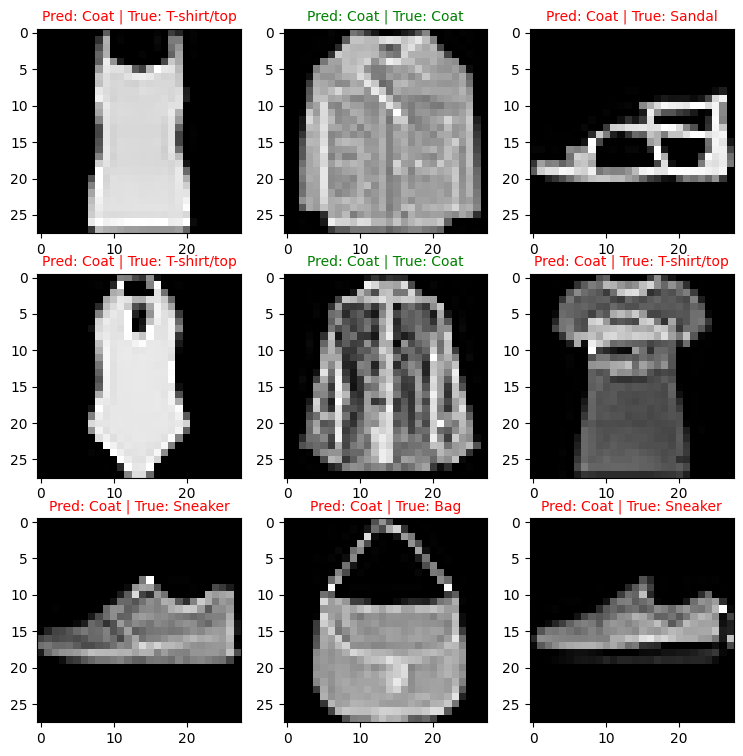

In [57]:
plt.figure(figsize=(9,9))

nrows=3
ncols=3

for i, sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(sample.squeeze(), cmap="gray") # this is the atually plotting of the target image that we are to show to the users

  pred_class=class_names[pred_classes[i]]
  true_class=class_names[test_labels[i]]


  title_text=f"Pred: {pred_class} | True: {true_class}"

  if pred_class==true_class:
    plt.title(title_text, fontsize=10, color="green")
  else:
    plt.title(title_text, fontsize=10,c="red")


# making a confusion matrix as one of the evaluation matrix

A confusion matrix is a fantastic way of evaluating classifciation mdoels

* make predictions with our trained model on the test dataset

* Make confusion marix torchmetrics.ConfusionMatrix

* Fking visualiza vilsualiza and visualiza and plot the changes

* plotting the changes can be done with mlxtend.plottign.plot_confusion_matrix()-


In [58]:
from tqdm.auto import tqdm

y_preds=[]
model_2.eval()

with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc= "making the predictions"):
    X,u=X.to(device),y.to(device)

    y_logits=model_2(X) # here we will be getting the logits of the model
    y_pred=torch.softmax(y_logits, dim=0).argmax(dim=1) # actual output of the logits
    y_preds.append(y_pred.cpu()) # append those predictions to the cpu for evaluation


  print(y_preds)
  y_pred_tensor=torch.cat(y_preds)
  y_pred_tensor[:10]



making the predictions:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 3, 3, 3, 5, 3, 3, 3, 3, 4, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 4, 3,
        3, 3, 1, 3, 3, 0, 3, 3]), tensor([3, 3, 3, 3, 4, 3, 2, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 2, 3, 3]), tensor([9, 1, 1, 3, 1, 3, 8, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 8, 1, 1]), tensor([1, 1, 1, 1, 1, 1, 8, 1, 8, 1, 1, 1, 1, 1, 1, 2, 8, 3, 3, 1, 1, 1, 1, 9,
        1, 8, 1, 2, 1, 1, 1, 1]), tensor([3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1,
        1, 1, 1, 1, 1, 8, 1, 1]), tensor([8, 1, 3, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 5, 3,
        3, 1, 3, 3, 3, 3, 3, 3]), tensor([3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3,
        3, 1, 3, 1, 3, 3, 3, 3]), tensor([4, 3, 3, 1, 8, 3, 8, 3, 2, 3, 9, 3, 8, 3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 1,
        5, 3, 3, 3, 3, 8, 3, 3]), tensor([1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 8, 1,
       

In [59]:
len(y_pred_tensor), len(test_data)

(10000, 10000)

In [60]:
import mlxtend
mlxtend.__version__

'0.24.0'

In [61]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  print(f"torchmetrics version: {torchmetrics.__version__}")
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  print(f"torchmetrics version: {torchmetrics.__version__}")

mlxtend version: 0.24.0
torchmetrics version: 1.8.2
